In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [2]:
historico = pd.read_csv('datasets-2412-4042-LaLiga_dataset.csv')
asistenciaAway14_15 = pd.read_csv('17825-960796-bundle-archive/Away attendance 2014-15.csv')
asistenciaAway15_16 = pd.read_csv('17825-960796-bundle-archive/Away attendance 2015-16.csv')
asistenciaAway16_17 = pd.read_csv('17825-960796-bundle-archive/Away attendance 2016-17.csv')

asistenciaHome14_15 = pd.read_csv('17825-960796-bundle-archive/Home attendance 2014-15.csv')
asistenciaHome15_16 = pd.read_csv('17825-960796-bundle-archive/Home attendance 2015-16.csv')
asistenciaHome16_17 = pd.read_csv('17825-960796-bundle-archive/Home attendance 2016-17.csv')

In [3]:
historico = historico[(historico['season'] == '2014-15') | (historico['season'] == '2015-16')| (historico['season'] == '2016-17')]


In [4]:
names = historico.columns.tolist()
names[names.index('club')] = 'Team'
names[names.index('season')] = 'Season'
historico.columns = names

In [5]:
away = pd.concat([asistenciaAway14_15, asistenciaAway15_16,asistenciaAway16_17], axis=0)
home = pd.concat([asistenciaHome14_15, asistenciaHome15_16,asistenciaHome16_17], axis=0)
historico['Season'] = historico['Season'].replace('-','/',regex = True)

In [6]:
historico['Team'] = historico['Team'].replace('Atletico de Madrid','Atletico Madrid',regex = True)
df = pd.merge(away,historico,how = 'inner',on = ['Season','Team'])
df = pd.merge(df,home,how = 'inner',on = ['Season','Team'])
df.columns

Index(['League_x', 'Team', 'Avg Away Attendance', 'Total Away Attendance',
       'Highest Away Attendance', 'Lowest Away Attendance', 'Season', 'KEY_x',
       'home_win', 'away_win', 'home_loss', 'away_loss', 'matches_won',
       'matches_lost', 'matches_drawn', 'total_matches', 'points',
       'home_goals', 'away_goals', 'goals_scored', 'goals_conceded',
       'goal_difference', 'League_y', 'Avg Home Attendance',
       'Total Home Attendance', 'Highest Home Attendance',
       'Lowest Home Attendance', 'KEY_y'],
      dtype='object')

In [7]:
graficar = df.iloc[:,[1,2,10,11,23]]
graficar['Avg Away Attendance'] = graficar['Avg Away Attendance'].replace(',','',regex = True)
graficar['Avg Away Attendance'] = pd.to_numeric(graficar['Avg Away Attendance'])
graficar['Avg Home Attendance'] = graficar['Avg Home Attendance'].replace(',','',regex = True)
graficar['Avg Home Attendance'] = pd.to_numeric(graficar['Avg Home Attendance'])
graficar

/Users/juancgarcia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/juancgarcia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/juancgarcia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,Team,Avg Away Attendance,home_loss,away_loss,Avg Home Attendance
0,Real Madrid,31380,1,5,73667
1,Barcelona,29152,2,2,77632
2,Atletico Madrid,28831,2,4,46867
3,Valencia,28361,1,4,41609
4,Real Sociedad,26937,5,9,21550
5,Sevilla,26852,1,7,30649
6,Eibar,26746,11,10,4835
7,Levante,26531,7,12,16357
8,Villarreal,26253,6,4,16091
9,Espanyol,26234,5,10,18600


In [8]:
pd.to_numeric(graficar['home_loss'])

0      1
1      2
2      2
3      1
4      5
5      1
6     11
7      7
8      6
9      5
10     5
11     8
12     9
13    12
14     2
15     2
16     1
17     4
18     6
19     5
20     7
21     3
22     6
23     6
24     5
25     6
26     7
27     7
28     1
29     1
30     1
31     3
32     6
33     7
34     4
35     6
36     7
37     4
38    10
39     4
Name: home_loss, dtype: int64

In [9]:
prueba = graficar.groupby(['Team']).agg({'Avg Away Attendance':'mean','away_loss':'mean','Avg Home Attendance':'mean','home_loss':'mean'})
prueba

,Avg Away Attendance,away_loss,Avg Home Attendance,home_loss
Team,,,,
Atletico Madrid,29773.666667,4.000000,46137.666667,2.000000
Barcelona,30616.333333,2.666667,78599.333333,1.666667
Cordoba,25384.000000,12.000000,16832.000000,12.000000
Eibar,27863.333333,9.666667,5099.333333,7.666667
Espanyol,27447.000000,10.000000,19756.333333,5.333333
Getafe,26843.500000,13.500000,7462.000000,7.000000
Las Palmas,27171.500000,13.500000,20810.500000,5.000000
Levante,27386.500000,13.500000,15394.500000,7.000000
Malaga,27000.333333,9.666667,22148.333333,5.666667


(-0.35, 15.65)

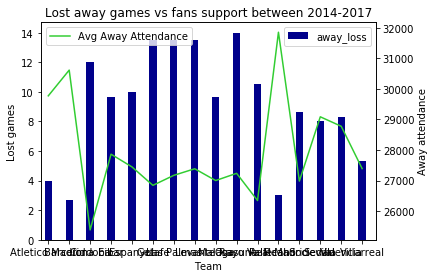

In [10]:
width = .35
prueba[['away_loss']].plot(kind='bar',width = width,use_index = True, title = 'Lost away games vs fans support between 2014-2017',color= 'darkblue')
ax = plt.gca()
ax.set_ylabel("Lost games")

prueba['Avg Away Attendance'].plot(secondary_y=True,color = 'limegreen')

ax = plt.gca()
ax.set_ylabel("Away attendance")
ax.legend()
plt.xlim([-width, len(prueba['away_loss'])-width])



(-0.35, 15.65)

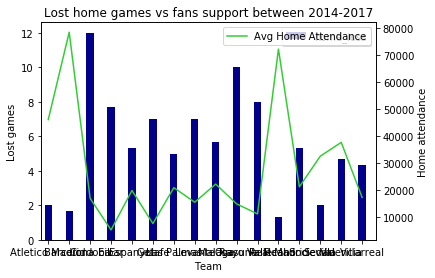

In [11]:
width = .35
prueba[['home_loss']].plot(kind='bar',width = width,use_index = True, title = 'Lost home games vs fans support between 2014-2017',color= 'darkblue')
ax = plt.gca()
ax.set_ylabel("Lost games")

prueba['Avg Home Attendance'].plot(secondary_y=True,color = 'limegreen')

ax = plt.gca()
ax.set_ylabel("Home attendance")
ax.legend()
plt.xlim([-width, len(prueba['away_loss'])-width])